# FA assignment - Descriptive Statistics
## Michelle Hackl
### 10/24/2016
---------------------------------------------------------------------

### Question 1:
- median() uses sort to arrange the numbers in the array in order and then finds the middle value if it is an array with an uneven amount of numbers or the average of the middle values otherwise.

In [14]:
import numpy as np
one_dimension = np.array( [1, 3, 4, 6] )
temperatures = py.load("temp_data.npy")

def median(array):
    array.sort()
    if len(array)%2 != 0:
        return float(array[len(array)/2])
    else:
        return float(array[(len(array)/2)-1] + float(array[(len(array)/2)]))/2
    
    
print median(temperatures [:,0])

14.070885011
14.4483943533


### Question 2:
- pearsons_r() calculates the deviation of each data point and squares them to calculate a part of the standard deviation. It then calculates the covariance from the deviations and the standard deviation values as well. It then outputs all values together in the formula for Pearson's r value. As a little extra it also outputs the R2 value for easier interpretation of the importance of the correlation, given that it is a linear relationship). Note that this formula is for population size (n-1) not sample size.

In [74]:
import numpy as np
two_dimension = np.array([ [1,2,3,5] , [12,8,22,1] ])


def pearsons_r(array):
    length = len(array[0])
    stdev_x = 0
    stdev_y = 0
    covariance = 0
    for i in range(length):
        dev_x = array[0,i] - float(sum(array[0]))/length
        stdev_x += dev_x**2
        dev_y = array[1,i] - float(sum(array[1]))/length
        stdev_y += dev_y**2
        covariance += (dev_x * dev_y)/(length-1)
    stdev_x = (stdev_x/(length-1))**0.5
    stdev_y = (stdev_y/(length-1))**0.5
    pearsons = covariance / stdev_x / stdev_y
    return pearsons, pearsons**2
    
print pearsons_r(two_dimension)

(-0.42840630363797133, 0.18353196099674968)


### Question 3:

- median() and double_median() calculate and print the median value of each data set.

- pearsons_r() calculates both the r and R2 value for columns instead of rows here.

- histogram() intakes the temperature values by column, defines bins and produces two histograms with labels and titles.

- scatterplot() also intakes the temperature values and produces a scatterplot.

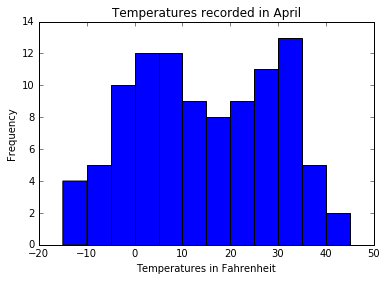

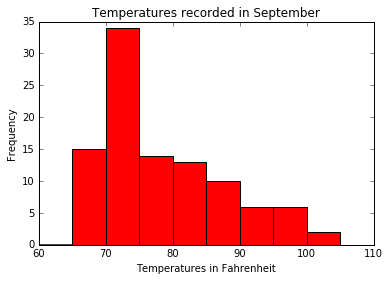

Median for data set 1:  14.4483943533
Median for data set 2:  75.3331620067


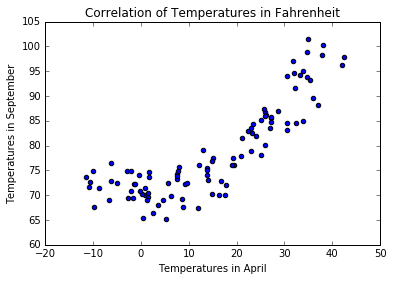

R and R2 for the data sets:  (0.85050284307705248, 0.72335508608214938)
[ -6.19521989 -10.79391233 -10.70850754  -8.68057969  -6.66869744
 -10.03731664  -9.81788512 -11.40489958  -6.28594012  -4.97697355
  -2.64595848  -2.18040719  -1.51815009   0.39186257   1.73068931
   0.75753571  -2.97344759  -1.16713869   0.23958261   0.90455417
   1.60095494   1.43332188  -2.18195894  -0.49859269  -1.72261574
   2.48073021   5.27704046  -0.16690797   5.61920932   1.3013019
   1.5275709    7.49689145   8.6111789    8.69580012   3.52132729
   7.61700493   6.27708391  11.98958631   4.53990476  13.75827012
   7.46993762   7.84877069   9.22028067  15.07342332   7.78437729
  12.11682998  17.72127604  14.8259037    9.66242617  14.93734503
  16.23540801  17.65009536  16.75200088  14.07088501  12.87674356
  20.93716639  13.78026512  13.86665297  23.01169598  19.49850291
  24.99290507  22.47954564  22.91748594  23.25062643  19.13250856
  19.18765732  21.04600365  27.16122     24.02657537  23.35368409
  28.

In [7]:
import numpy as py
import matplotlib.pyplot as plt
%matplotlib inline
temperatures = py.load("temp_data.npy")

april = temperatures[:,0]
sept = temperatures[:,1]

def median(array):
    sorted_data = np.copy(array)
    sorted_data.sort()
    if len(sorted_data)%2 != 0:
        return float(sorted_data[len(sorted_data)/2])
    else:
        return float(sorted_data[(len(array)/2)-1] + float(sorted_data[(len(array)/2)]))/2
    
def double_median(a1, a2):
    print "Median for data set 1: ", median(a1)
    print "Median for data set 2: ", median(a2)
    
def pearsons_r(array):
    length = len(array[:,0])
    stdev_x = 0
    stdev_y = 0
    covariance = 0
    for i in range(length):
        dev_x = array[i,0] - float(sum(array[:,0]))/length
        stdev_x += dev_x**2
        dev_y = array[i,1] - float(sum(array[:,1]))/length
        stdev_y += dev_y**2
        covariance += (dev_x * dev_y)/(length-1)
    stdev_x = (stdev_x/(length-1))**0.5
    stdev_y = (stdev_y/(length-1))**0.5
    pearsons = covariance / stdev_x / stdev_y
    return pearsons, pearsons**2

def histogram(x,y):
    bins_x = [-15, -10, -5, 0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
    bins_y = [60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110]
    plt.hist(x, bins_x, histtype='bar', color = 'b')
    plt.ylabel('Frequency')
    plt.xlabel('Temperatures in Fahrenheit')
    plt.title('Temperatures recorded in April')
    plt.show()
    plt.hist(y, bins_y, histtype='bar', color = 'r')
    plt.ylabel('Frequency')
    plt.xlabel('Temperatures in Fahrenheit')
    plt.title('Temperatures recorded in September')
    plt.show()
    
def scatterplot(x,y):
    plt.scatter(x,y)
    plt.title("Correlation of Temperatures in Fahrenheit")
    plt.xlabel("Temperatures in April")
    plt.ylabel("Temperatures in September")
    plt.show()
    
histogram(april, sept)
double_median(april, sept)
scatterplot(april, sept)
print "R and R2 for the data sets: ", pearsons_r(temperatures)
print april

#### Interpretation:
The computed value for r (0.85) suggests that there is a strong, positive correlation between the changes of Temperature that were recorded on the 1st of September and the values recorded on 1st of April. My R2 value suggests that about 72% of variations within the data are explained by the correlation, I would, however, only rely on that value if the relationship is linear, which seems to be mostly the case here. My scatterplot cleary supports that there is a strong upwards trend in the correlation with a medium-high correlation, as can be explained by the r value.
The histograms can not be used to show this trend, but they show the frequency of different temperature datums recorded on both 1st of April and September over the given time period.